In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from textblob import TextBlob
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
#from nltk.

In [2]:
df = pd.read_csv('Elon_musk.csv',encoding='cp1252',index_col=[0])
df

,Text
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
df['len'] = df['Text'].apply(len)
df

,Text,len
1,@kunalb11 I’m an alien,22
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
3,@joerogan @Spotify Great interview!,35
4,@gtera27 Doge is underestimated,31
5,@teslacn Congratulations Tesla China for amazi...,104
...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...",144
1996,@PPathole Make sure to read ur terms &amp; con...,77
1997,@TeslaGong @PPathole Samwise Gamgee,35
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,59


## Data Exploration

<Axes: >

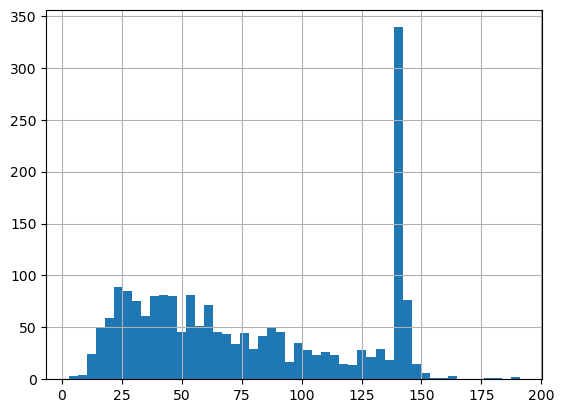

In [4]:
df['len'].hist(bins=50)

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 1 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
 1   len     1999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 46.9+ KB


In [6]:
df.describe()

,len
count,1999.000000
mean,78.442721
std,44.617029
min,3.000000
25%,39.000000
50%,68.000000
75%,129.000000
max,191.000000


In [7]:
df[df['len']==191].iloc[0]

Text    RT @Tesla: Big updates in <U+0001F1E8><U+0001F...
len                                                   191
Name: 1508, dtype: object

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
def cleanwords(title):
    no_punch = [x for x in title if x not in string.punctuation]
    no_pun= ''.join(no_punch)
    return [x for x in no_pun.split() if x.lower() not in stopwords.words('english')]
   

In [13]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [14]:
df['Text'] = df['Text'].apply(lambda x: clean_text(x))
df.head(10)

,Text,len
1,i’m an alien,22
2,idaacarmack ray tracing on cyberpunk with hdr ...,82
3,joerogan spotify great interview,35
4,doge is underestimated,31
5,teslacn congratulations tesla china for amazin...,104
6,happy new year of the ox,49
7,frodo was the underdogeall thought he would fa...,96
8,owensparks flcnhvy haha thanks,46
9,flcnhvy indeed tweets definitely do not repre...,89
10,the most entertaining outcome is the most likely,48


## Basic feature extraction

In [15]:
pstem = PorterStemmer()

In [16]:
wnlem = WordNetLemmatizer() 

### Count vectoriser tells the frequency of a word.

In [17]:
conv = CountVectorizer(analyzer=cleanwords,ngram_range=(1,1))

In [18]:
con_vtr = conv.fit_transform(df['Text'])
con_vtr

<1999x4588 sparse matrix of type '<class 'numpy.int64'>'
	with 13279 stored elements in Compressed Sparse Row format>

In [19]:
conv.get_feature_names_out()

array(['aber', 'able', 'aboard', ..., '…', '…yeah', '…you’re'],
      dtype=object)

In [20]:
word_freq_df = pd.DataFrame({'term': conv.get_feature_names_out(), 'occurrences':np.asarray(con_vtr.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(10)

,term,occurrences,frequency
0,aber,1,0.000074
1,able,6,0.000446
2,aboard,1,0.000074
3,abort,3,0.000223
4,abo…,1,0.000074
5,absence,1,0.000074
6,absolute,1,0.000074
7,absolutely,15,0.001115
8,absorb,1,0.000074
9,absorption,1,0.000074


### Term frequency inverse document Frequency (TFIDF)

In [21]:
tf = TfidfTransformer()

In [22]:
tf_id = tf.fit_transform(con_vtr)
tf_id

<1999x4588 sparse matrix of type '<class 'numpy.float64'>'
	with 13279 stored elements in Compressed Sparse Row format>

In [24]:
df['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

1                                         i’m an alien
2    idaacarmack ray tracing on cyberpunk with her ...
3                     joerogan specify great interview
4                               done is underestimated
5    teslacn congratulations tell china for amazing...
Name: Text, dtype: object

In [25]:
TextBlob(df['Text'][3]).ngrams(1)

[WordList(['joerogan']),
 WordList(['spotify']),
 WordList(['great']),
 WordList(['interview'])]

In [26]:
TextBlob(df['Text'][3]).ngrams(2)

[WordList(['joerogan', 'spotify']),
 WordList(['spotify', 'great']),
 WordList(['great', 'interview'])]

In [27]:
TextBlob(df['Text'][3]).ngrams(3)

[WordList(['joerogan', 'spotify', 'great']),
 WordList(['spotify', 'great', 'interview'])]

### Bi-gram

In [28]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [29]:
top2_words = get_top_n2_words(df["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,rt spacex,71
1,will be,51
2,of the,47
3,in the,36
4,this is,35
5,to the,28
6,to be,28
7,we re,26
8,is the,24
9,should be,22


### Bi-gram Plot

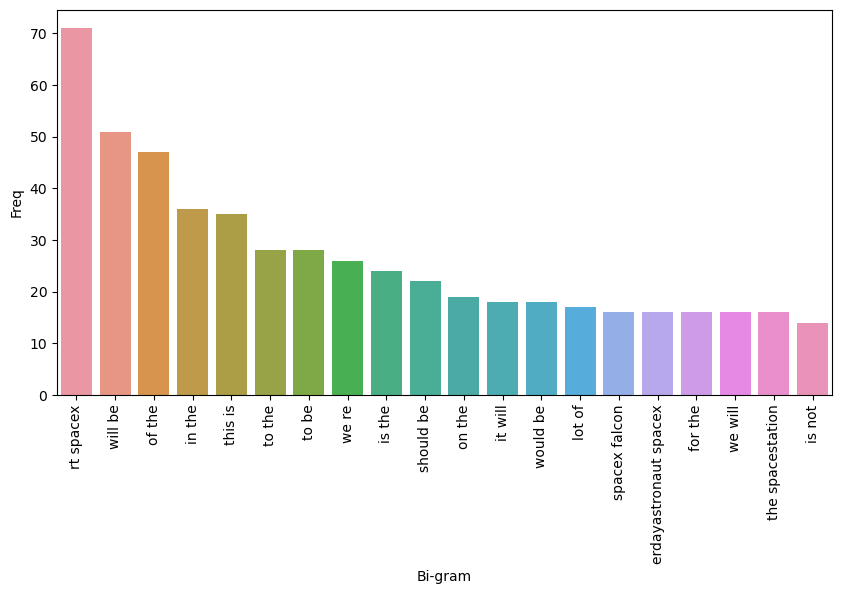

In [30]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

### Tri-gram

In [31]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [32]:
top3_words = get_top_n3_words(df["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)


,Tri-gram,Freq
0,rt spacex falcon,16
1,falcon first stage,9
2,to the spacestation,9
3,it will be,8
4,spacex falcon first,8
5,thesheetztweetz waemd spacex,8
6,of course still,7
7,course still love,7
8,still love you,7
9,one of the,7


### Tri-gram plot

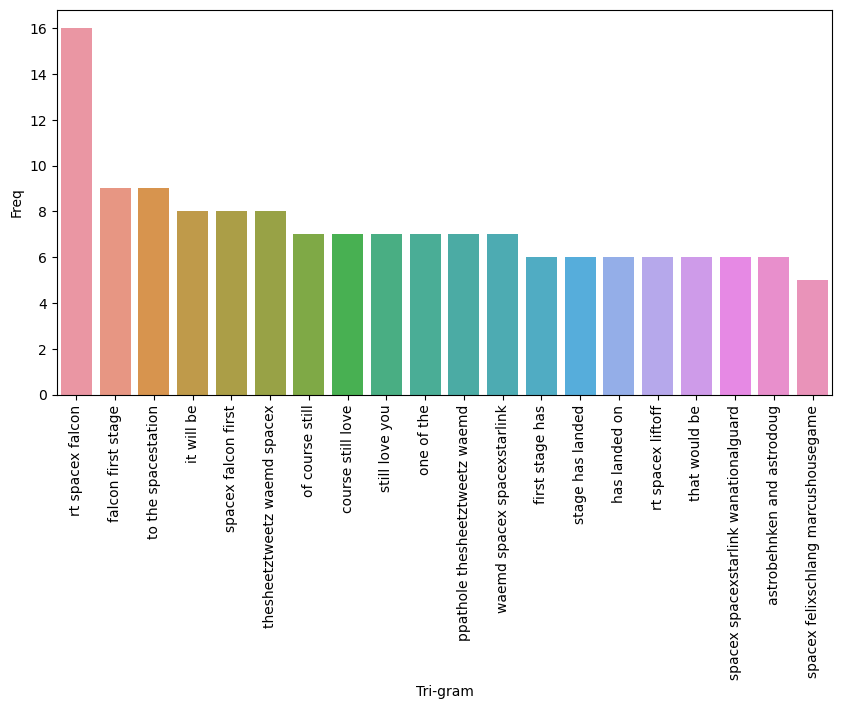

In [33]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

### WordCloud

In [34]:
string_Total = " ".join(df["Text"])

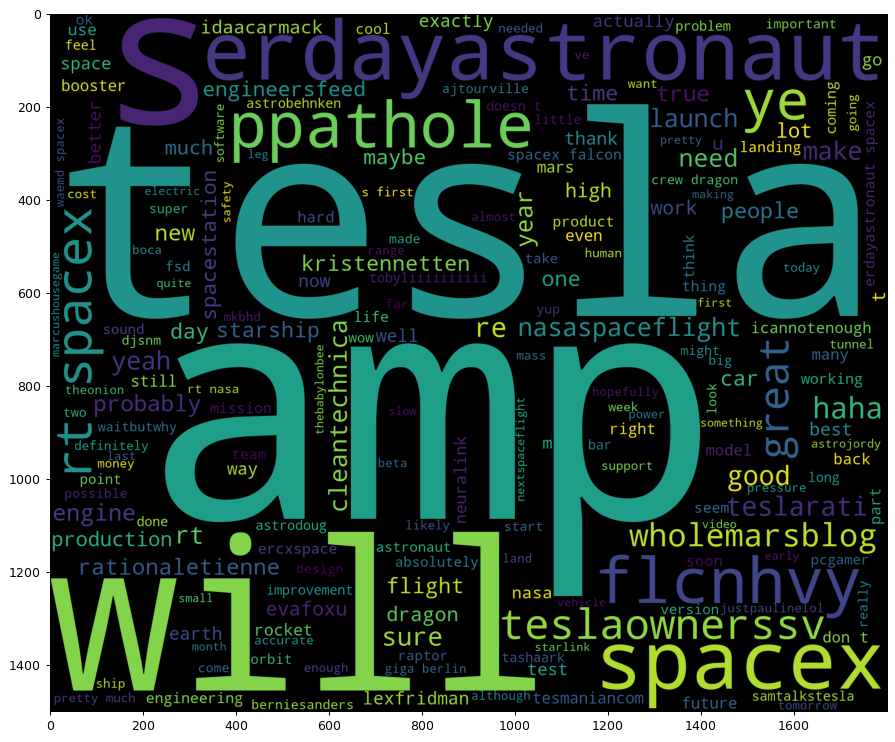

In [35]:
plt.figure(figsize=(12,12),dpi=90)
word_cld = WordCloud(background_color='black',width=1800,height=1500).generate(string_Total)
plt.imshow(word_cld);

In [36]:
# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
df.head(11)

,Text,len,subjectivity,polarity
1,i’m an alien,22,0.750000,-0.250000
2,idaacarmack ray tracing on cyberpunk with hdr ...,82,0.000000,0.000000
3,joerogan spotify great interview,35,0.750000,0.800000
4,doge is underestimated,31,0.000000,0.000000
5,teslacn congratulations tesla china for amazin...,104,0.366667,0.275000
6,happy new year of the ox,49,0.727273,0.468182
7,frodo was the underdogeall thought he would fa...,96,0.500000,0.500000
8,owensparks flcnhvy haha thanks,46,0.250000,0.200000
9,flcnhvy indeed tweets definitely do not repre...,89,0.500000,0.000000
10,the most entertaining outcome is the most likely,48,0.675000,0.375000


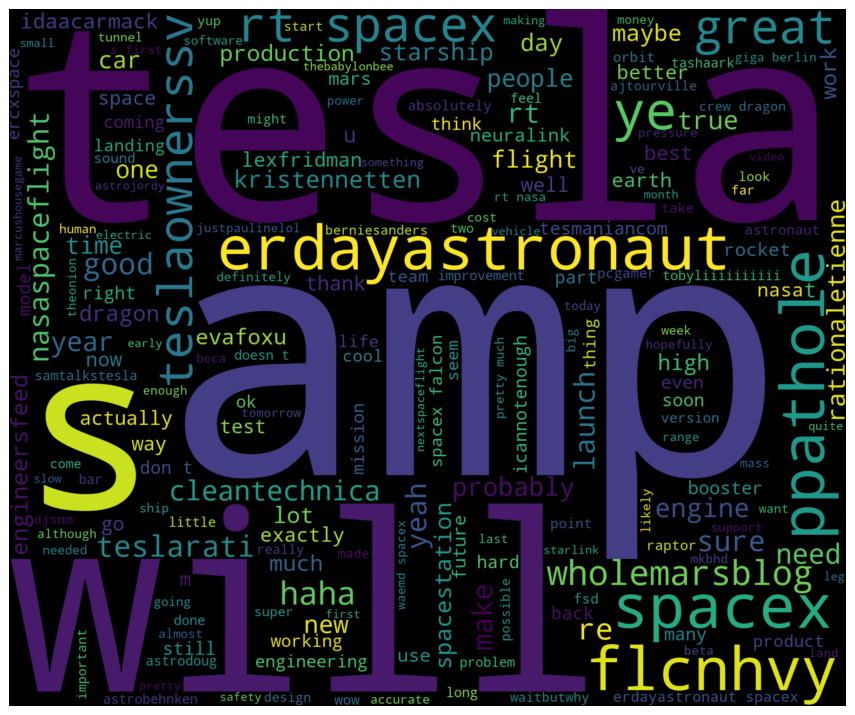

In [37]:
allwords = " ".join([texts for texts in df["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [38]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'negitive' if polarity_scores['neg'] > polarity_scores['pos'] else 'positive'

df['analysis1']=df['Text'].apply(fetch_sentiment_using_SIA)

In [39]:
# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity >= 0 else 'negitive'
df['analysis2']=df['Text'].apply(fetch_sentiment_using_textblob)

In [40]:
def analysis(score):
    if score <0 :
        return 'Negative'
    if score ==0:
        return 'Nutral'
    else:
        return 'Positive'

In [41]:
df['analysis'] = df['polarity'].apply(analysis)

In [42]:
df

,Text,len,subjectivity,polarity,analysis1,analysis2,analysis
1,i’m an alien,22,0.750000,-0.250000,positive,negitive,Negative
2,idaacarmack ray tracing on cyberpunk with hdr ...,82,0.000000,0.000000,positive,positive,Nutral
3,joerogan spotify great interview,35,0.750000,0.800000,positive,positive,Positive
4,doge is underestimated,31,0.000000,0.000000,negitive,positive,Nutral
5,teslacn congratulations tesla china for amazin...,104,0.366667,0.275000,positive,positive,Positive
...,...,...,...,...,...,...,...
1995,flcnhvy true it sounds so surreal but the nega...,144,0.508333,0.111111,negitive,positive,Positive
1996,ppathole make sure to read ur terms amp condit...,77,0.888889,0.500000,positive,positive,Positive
1997,teslagong ppathole samwise gamgee,35,0.000000,0.000000,positive,positive,Nutral
1998,ppathole altho dumb and dumber is,59,0.500000,-0.375000,negitive,negitive,Negative


In [43]:
df['analysis'].value_counts()

Nutral      903
Positive    880
Negative    216
Name: analysis, dtype: int64